In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pickle
import numpy as np  
import pandas as pd  

from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, Embedding, add
from tqdm.autonotebook import tqdm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  del sys.path[0]


In [ ]:
images_path = '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/'
from glob import glob
images = glob(images_path+'*.jpg')
len(images)
for i in images:
 print(i)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8275.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8219.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8300.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8257.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8303.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8304.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8170.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8315.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8331.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8264.jpg
/content/drive/MyDrive/Bangla Image Cap

In [ ]:
images[:5]

['/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8405.jpg',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8440.jpg',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8507.jpg',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8468.jpg',
 '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/8448.jpg']

In [ ]:
!pip install tensorflow keras pillow numpy tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import string
import numpy as np
from PIL import Image
import os
from pickle import dump, load
import numpy as np
import tensorflow as tf
from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from keras.layers.merge import add
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout

# small library for seeing the progress of loops.
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

In [ ]:
image_path = '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/IMAGE/'

train_image_paths = image_path[:60]

In [ ]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.keras.layers.Resizing(299, 299)(img)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [ ]:
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:

image_path_to_caption = '//content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/1-10000.txt/'

In [ ]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm
import tensorflow as tf


from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [ ]:
BASE_DIR = '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset'
WORKING_DIR = '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/'

In [ ]:
# load vgg19 model
model = VGG19()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-3].output)
# summarize
print(model.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Feature Extract from VGG19

In [ ]:
# extract features from image
features = {}
directory = os.path.join(BASE_DIR, 'IMAGE')

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

  0%|          | 0/6814 [00:00<?, ?it/s]

In [ ]:
#STORE FEATURES IN PICKLE
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'),'wb'))

In [ ]:
#LOAD FEATURES
with open(os.path.join(WORKING_DIR, 'features.pkl'),'rb') as f:
  features = pickle.load(f)

In [ ]:
len(features) 

6814

In [ ]:
with open(os.path.join(BASE_DIR, 'BI Captions.txt'),'r') as f:
  next(f)
  captions_doc = f.read()

In [ ]:
captions_doc

"2.jpg সমুদ্রে একটি সাদা জাহাজ চলছে\n3.jpg সুউচ্চ সবুজ পাহাড় আর মেঘলা আকাশ \n4.jpg আকাশে সাদা পাখি উড়ছে   \n5.jpg সারি সারি কাঠের বাক্স\n6.jpg জানালার গ্লাসে বৈদ্যুতিক খাম্বার প্রতিফলন দেখা যাচ্ছে \n7.jpg দুই কাঁধে রঙিন বেতের ঝুড়ি নিয়ে যাচ্ছে একজন লোক\n8.jpg সাদাকালো অনেকগুলো কুকুর একসারিতে বসে আছে\n9.jpg কমলা, টিয়া রংয়ের সারি সারি জুতা সাজানো\n10.jpg সমুদ্রের পাড়ে পরে আছে মরচে ধরা শিকল\n11.jpg অনেকগুলো স্ক্রু জড়ে করা\n12.jpg অটো রিকশা নিয়ে দাঁড়িয়ে আছে রিকশাচালকটি\n13.jpg অনেকগুলো তোয়ালে ভাজ করে স্তুপ করে রাখা আছে\n14.jpg ধুসর দোকানগুলোর মাঝে লাল রংয়ের একটি টেলিফোন বুথ\n15.jpg পিচঢালা রাস্তার উপর পরে আছে শুকনো পাতা\n16.jpg লেকের মাঝে নৌকায় ছোট মেয়েটি একা বসে আছে\n17.jpg ছোট টিলার পাশে রঙিন কাঠের কিছু ঘর\n18.jpg দিগন্ত বিস্তৃত  সবুজ মাঠ ছুয়ে গেছে নীল আকাশকে\n19.jpg শান্ত সমুদ্র ও রৌদ্রজ্জল নীল আকাশ \n20.jpg একটি খোলা বই ও পেন্সিল \n21.jpg টেবিলের উপর রাখা অগোছালো বইয়ের স্তুপ\n22.jpg পিচঢালা রাস্তার পাশে সবুজ মাঠ\n23.jpg দুই প্রতিযোগির মধ্যে চলছে কার রেসিং \n100.jpg রেস্টুরেন্টে বসে আছে 

In [ ]:
mapping = {}
# PROCESS LINE
for line in tqdm(captions_doc.split('\n')):
  #SPLIT THE LINE BY COMMA
  tokens = line.split(',')
  if len(line) <2:
    continue
  image_id, caption = tokens[0], tokens[1:]
  #REMOVE EXTENSION FROM IMAGE ID
  image_id = image_id.split('.')[0]
  #CONVERT CAPTION LIST TO STRING
  caption = " ".join(caption)
  #CREATE LIST IF NEED
  if image_id not in mapping:
    mapping[image_id] = []
  mapping[image_id].append(caption)

  0%|          | 0/7090 [00:00<?, ?it/s]

In [ ]:
#CHECK
len(mapping)

5777

In [ ]:
def clean(mapping):
  for key, captions in mapping.items():
    for i in range(len(captions)):
      caption = captions[i] #TAKE ONE CAPTION AT A TIME
      #PREPROCESSING STEPS
      caption = caption.lower() #CONVERT TO LOWER CASE
      caption = caption.replace('\s+',' ') #DELETE ADDITIONAL SPACES
      #ADD START AND TAGS TO THE CAPTIONS
      #caption = '<start> ' + caption + ' <end>' #HELP'S TO START AND STOP PREDICITON, END TAG HELPS TO STOP
      #caption = '<start> ' + " ".join(word for word in caption.split() if len(word) > 1) + ' <end>' #remove small first word such as 'a'
      captions[i] = caption

In [ ]:
clean(mapping)

In [ ]:
all_captions = []
for key in mapping:
  for caption in mapping[key]:
    all_captions.append(caption)

#check
print(len(features))
print(len(all_captions))
all_captions[:10]

6814
7055


['', '', '', '', '', '', '', ' টিয়া রংয়ের সারি সারি জুতা সাজানো', '', '']

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 28.9 MB/s 
     |████████████████████████████████| 86 kB 4.0 MB/s 
     |████████████████████████████████| 6.6 MB 41.9 MB/s 
     |████████████████████████████████| 596 kB 56.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import AutoTokenizer, AutoModel


bnbert_tokenizer = AutoTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
text =  'দুইটি কৃষ্ণচূড়া গাছের পিছনে ঢাকা বিশ্ববিদ্যালয়ের একটা বাস দেখা যাচ্ছে।\n\n1510002  মধুর ক্যান্টিনের বারান্দায় কয়েকজন ছাত্র বসে গল্প করছে।\n\n1510003 মধুর ক্যান্টিনের সামনে ছাত্ররা জড়ো হয়েছে।\n\n1510004 অপরাজেয় বাংলার পাদদেশে অনেক মানুষ বসে আছে।\n\n1510005 ঢাকা বিশ্ববিদ্যালয় লাইব্রেরি থেকে একজন হুডি পড়া ছেলে বের হচ্ছে আর একজন নেভি ব্লু রঙের হুডি পড়া ছাত্র ভিতরে ঢুকছে।\n\n1520001 একটি মেয়ে হলুদ রঙের একটা মুখোশ নকশা করছে।\n\n1520002 দুইজন মেয়ে শাড়ি আর মাথায় ফুলের মুকুট পড়েছে, পাশে কয়েকটা বাচ্চা ফেস্টুন নিয়ে দাঁড়িয়ে আছে।\n\n1520003  সবাই লাল সাদা জামা পড়ে হাতে ফেস্টুন নিয়ে সামনে যাচ্ছে।\n\n1520004  একটা মেয়ে লাল শাড়ি আর মাথায় ফুল পড়েছে এবং তার গালে শুভ নববর্ষ লেখা।\n\n1520005 কয়েকটা মেয়ে মাথায় ফুলের মুকুট আর লাল শাড়ি পড়ে হাটছে।\n\n1502006 দুইজন মহিলা হলুদ ফুলের তিতলি আর মালা পড়ে ছবি গাঁদা ফুল দেখছে।\n\n1502007 মাথায় ফুলের মুকুট পড়া একজন মেয়ে দুইটা মেয়ের ছবি তুলে দিচ্ছে।\n\n1520008 তিনজন মেয়ে শাড়ি আর ফুলের গয়না পড়ে নৃত্য পরিবেশনা করছে।\n\n15030001 চারটা বাচ্চা গল্পের বই দেখছে।\n\n'


tokens = bnbert_tokenizer.tokenize(captions_doc)

print("Total Tokens", len(tokens))
print(tokens)


Downloading:   0%|          | 0.00/491 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

Total Tokens 105456
['2', '.', '[UNK]', 'সম', '##দরে', 'একটি', 'সাদা', 'জাহাজ', 'চলছে', '3', '.', '[UNK]', 'স', '##উ', '##চ', '##চ', 'সব', '##জ', 'পা', '##হা', '##ড', 'আর', 'মেঘলা', 'আকাশ', '4', '.', '[UNK]', 'আকাশে', 'সাদা', 'পাখি', 'উড', '##ছে', '5', '.', '[UNK]', 'সারি', 'সারি', 'কাঠের', 'বাক', '##স', '6', '.', '[UNK]', 'জানালার', 'গলা', '##সে', 'বৈ', '##দ', '##যত', '##িক', 'খাম', '##বার', 'পরত', '##িফ', '##লন', 'দেখা', 'যা', '##চ', '##ছে', '7', '.', '[UNK]', 'দই', 'কাধে', 'রঙিন', 'বেতের', 'ঝ', '##ডি', 'নি', '##যে', 'যা', '##চ', '##ছে', 'একজন', 'লে', '##াক', '8', '.', '[UNK]', 'সাদা', '##কালে', '##া', 'অনেক', '##গলে', '##া', 'কক', '##র', 'একসারি', '##তে', 'বসে', 'আছে', '9', '.', '[UNK]', 'কমলা', ',', 'টি', '##যা', 'রং', '##যে', '##র', 'সারি', 'সারি', 'জ', '##তা', 'সাজান', '##ে', '##া', '[UNK]', '.', '[UNK]', 'সম', '##দরে', '##র', 'পা', '##ডে', 'পরে', 'আছে', 'মরচে', 'ধরা', 'শিকল', '[UNK]', '.', '[UNK]', 'অনেক', '##গলে', '##া', 'সক', '##র', 'জ', '##ডে', 'করা', '[UNK]', '.', '[UNK]', '

In [ ]:
# plotting
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt



In [ ]:
#TOKENIZE TEXT
bnbert_tokenizer = Tokenizer()
bnbert_tokenizer.fit_on_texts(all_captions)
vocab_size = len(bnbert_tokenizer.word_index)+1

vocab_size #CHECK

467

In [ ]:
def create_vocabulary(data):
  vocab = []
  for captions in data.Captions.values:
    vocab.extend(captions.split())
  print("Vocabulary Size : {}".format(len(set(vocab))))
  return vocab

In [ ]:
#GET MAXIMUM LENGTH OF THE CAPTION FOR PADDING THE SEQUENCE AND MODEL
max_length = max(len(caption.split()) for caption in all_captions)

max_length  #check

24

In [ ]:


#GET MAXIMUM LENGTH OF THE CAPTION FOR PADDING THE SEQUENCE AND MODEL
avg_length = sum(len(caption.split()) for caption in all_captions)/max_length

avg_length #check

45.125

In [ ]:

#GET MAXIMUM LENGTH OF THE CAPTION FOR PADDING THE SEQUENCE AND MODEL
total_length =sum(len(caption.split()) for caption in all_captions)

total_length#check

1083

In [ ]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

#check
print(len(train))
print(len(test))

5199
578


In [ ]:
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def data_generator(data_keys, mapping, features, bnbert_tokenizer, max_length, vocab_size, batch_size):
  #loop over images
  X1, X2, y = list(), list(), list()
  n = 0
  while 1:
    for key in data_keys:
      n+=1
      caption = mapping[key]
      #process each caption
      for caption in caption:
        #encode the sequence
        seq = bnbert_tokenizer.texts_to_sequences([caption])[0]
        #split the sequence into X,y pairs
        for i in range(1, len(seq)):
          #split into input and output pairs
          in_seq, out_seq = seq[:i],seq[i]
          #pad input sequence
          in_seq = pad_sequences([in_seq], maxlen = max_length)[0]
          #encode output sequence
          out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

          #store sequences
          X1.append(features[key][0])
          X2.append(in_seq)
          y.append(out_seq)
  if n == batch_size:
    X1, X2, y = np.array(X1), np.array(X2), np.array(y)
    yield [X1,X2], y
    X1, X2, y = list(), list(), list()
    n = 0

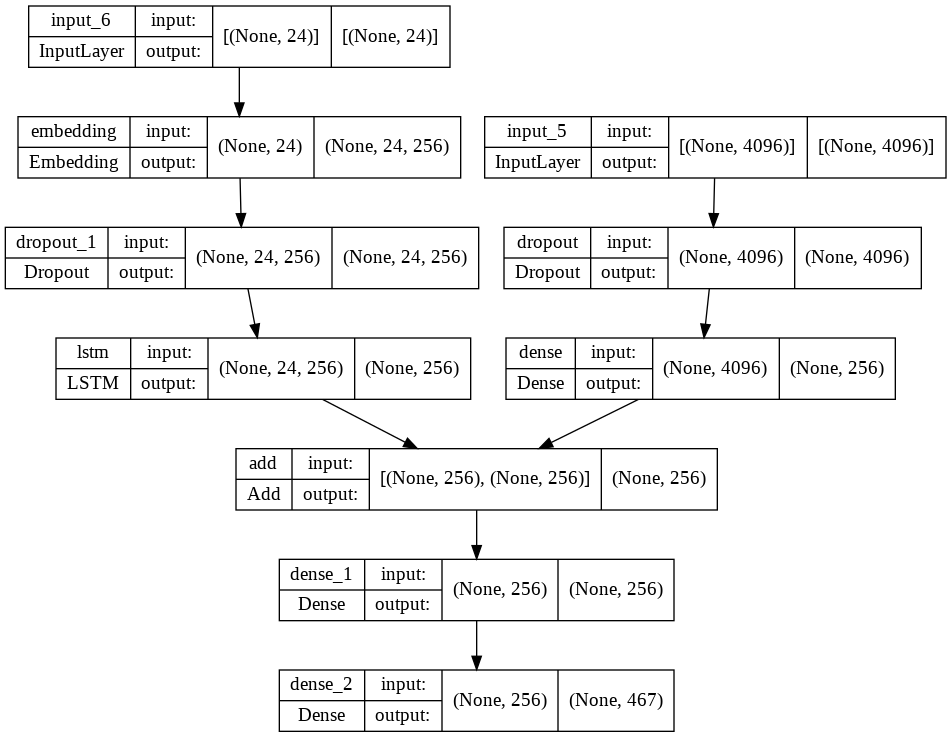

In [ ]:
 # encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 24)]         0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 24, 256)      119552      ['input_6[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 4096)         0           ['input_5[0][0]']                
                                                                                            